Graph saved as 'member_comparison_analysis.png'


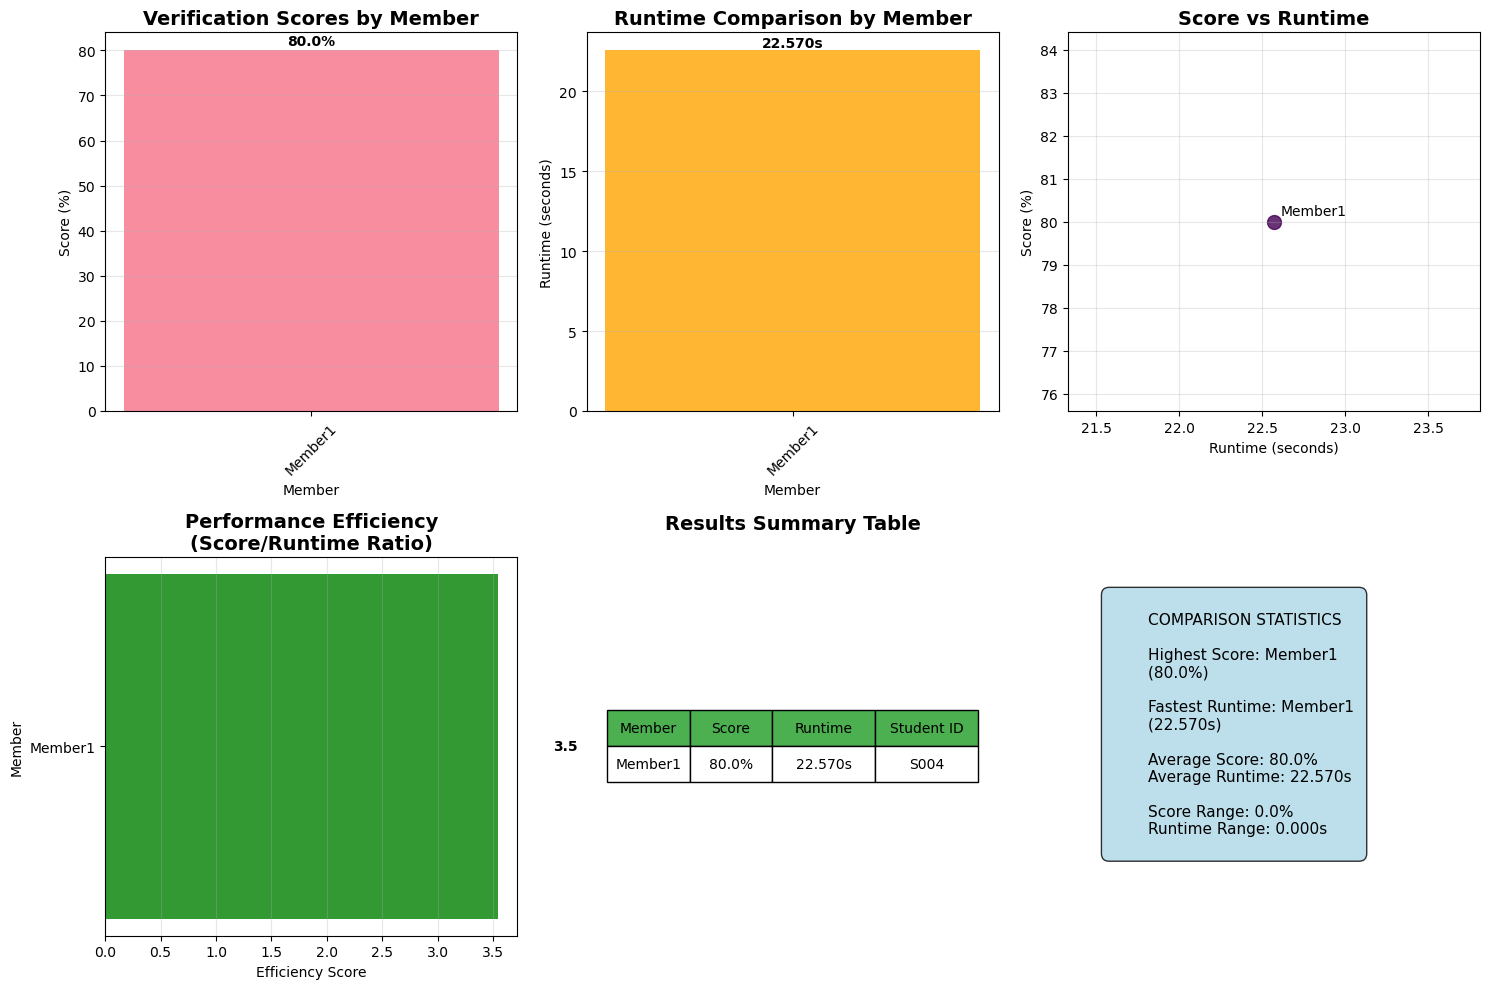

DETAILED MEMBER PERFORMANCE ANALYSIS

MEMBER1:
  Student ID: S004
  Score: 80.00%
  Runtime: 22.5697 seconds
  Timestamp: 2025-08-26 20:55:18.282480
  Score Assessment: GOOD
  Speed Assessment: SLOW

RANKING SUMMARY:

BY ACCURACY (Score):
  1. Member1: 80.0%

BY SPEED (Runtime):
  1. Member1: 22.570s

OVERALL PERFORMANCE (Score/Time Balance):
  1. Member1: 3.5 efficiency score


In [2]:
# Add this to a new cell in your notebook - AFTER the ResultLogger class

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import json
import numpy as np

class ResultsAnalyzer:
    """
    Analyzes and visualizes results from multiple member verification systems.
    """
    
    def __init__(self, results_directory: str = "results"):
        """
        Initialize the analyzer.
        
        Args:
            results_directory (str): Directory containing member result files
        """
        self.results_dir = Path(results_directory)
        
    def load_all_results(self) -> pd.DataFrame:
        """
        Load all member results into a pandas DataFrame.
        
        Returns:
            pd.DataFrame: Combined results from all members
        """
        all_results = []
        
        # Look for all *_results.json files
        for filepath in self.results_dir.glob("*_results.json"):
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    all_results.append(data)
            except Exception as e:
                print(f"Warning: Could not load {filepath}: {e}")
                
        if not all_results:
            print("No result files found!")
            return pd.DataFrame()
            
        # Convert to DataFrame
        df = pd.DataFrame(all_results)
        
        # Convert timestamp to datetime if it exists
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            
        return df
    
    def generate_comparison_table(self) -> pd.DataFrame:
        """
        Generate a formatted comparison table of all members.
        
        Returns:
            pd.DataFrame: Formatted comparison table
        """
        df = self.load_all_results()
        
        if df.empty:
            print("No data to analyze!")
            return pd.DataFrame()
        
        # Create summary table
        summary = df.copy()
        
        # Format score as percentage
        summary['Score (%)'] = (summary['score'] * 100).round(2)
        
        # Format runtime 
        summary['Runtime (s)'] = summary['runtime'].round(4)
        
        # Reorder columns for display
        display_cols = ['member', 'student_id', 'Score (%)', 'Runtime (s)', 'timestamp']
        summary = summary[display_cols]
        
        # Rename columns for better display
        summary.columns = ['Member', 'Student ID', 'Score (%)', 'Runtime (s)', 'Timestamp']
        
        return summary
    
    def generate_comparison_graphs(self, save_plots: bool = True):
        """
        Generate comparison graphs for member performance.
        
        Args:
            save_plots (bool): Whether to save plots to files
        """
        df = self.load_all_results()
        
        if df.empty:
            print("No data to analyze!")
            return
        
        # Set up the plotting style
        plt.style.use('default')
        sns.set_palette("husl")
        
        # Create a figure with multiple subplots
        fig = plt.figure(figsize=(15, 10))
        
        # 1. Score Comparison Bar Chart
        plt.subplot(2, 3, 1)
        scores_pct = df['score'] * 100
        bars = plt.bar(df['member'], scores_pct, alpha=0.8)
        plt.title('Verification Scores by Member', fontsize=14, fontweight='bold')
        plt.xlabel('Member')
        plt.ylabel('Score (%)')
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar, score in zip(bars, scores_pct):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{score:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(axis='y', alpha=0.3)
        
        # 2. Runtime Comparison Bar Chart
        plt.subplot(2, 3, 2)
        bars = plt.bar(df['member'], df['runtime'], alpha=0.8, color='orange')
        plt.title('Runtime Comparison by Member', fontsize=14, fontweight='bold')
        plt.xlabel('Member')
        plt.ylabel('Runtime (seconds)')
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar, runtime in zip(bars, df['runtime']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{runtime:.3f}s', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(axis='y', alpha=0.3)
        
        # 3. Score vs Runtime Scatter Plot
        plt.subplot(2, 3, 3)
        scatter = plt.scatter(df['runtime'], df['score'] * 100, 
                            c=range(len(df)), cmap='viridis', s=100, alpha=0.8)
        plt.title('Score vs Runtime', fontsize=14, fontweight='bold')
        plt.xlabel('Runtime (seconds)')
        plt.ylabel('Score (%)')
        
        # Add member labels to points
        for i, member in enumerate(df['member']):
            plt.annotate(member, (df.iloc[i]['runtime'], df.iloc[i]['score'] * 100),
                        xytext=(5, 5), textcoords='offset points', fontsize=10)
        
        plt.grid(alpha=0.3)
        
        # 4. Performance Ranking (Score/Runtime ratio)
        plt.subplot(2, 3, 4)
        # Higher score and lower runtime is better
        performance_ratio = (df['score'] * 100) / (df['runtime'] + 0.001)  # Avoid division by zero
        sorted_data = df.copy()
        sorted_data['performance'] = performance_ratio
        sorted_data = sorted_data.sort_values('performance', ascending=True)
        
        bars = plt.barh(sorted_data['member'], sorted_data['performance'], alpha=0.8, color='green')
        plt.title('Performance Efficiency\n(Score/Runtime Ratio)', fontsize=14, fontweight='bold')
        plt.xlabel('Efficiency Score')
        plt.ylabel('Member')
        
        # Add value labels
        for bar, perf in zip(bars, sorted_data['performance']):
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                    f'{perf:.1f}', ha='left', va='center', fontweight='bold')
        
        plt.grid(axis='x', alpha=0.3)
        
        # 5. Detailed Comparison Table (as text)
        plt.subplot(2, 3, 5)
        plt.axis('off')  # Turn off axis
        
        # Create table data
        table_data = []
        for _, row in df.iterrows():
            table_data.append([
                row['member'],
                f"{row['score']*100:.1f}%",
                f"{row['runtime']:.3f}s",
                row['student_id']
            ])
        
        # Create table
        table = plt.table(cellText=table_data,
                         colLabels=['Member', 'Score', 'Runtime', 'Student ID'],
                         cellLoc='center',
                         loc='center',
                         colWidths=[0.2, 0.2, 0.25, 0.25])
        
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        
        # Style the table
        table[(0, 0)].set_facecolor('#4CAF50')
        table[(0, 1)].set_facecolor('#4CAF50')
        table[(0, 2)].set_facecolor('#4CAF50')
        table[(0, 3)].set_facecolor('#4CAF50')
        
        plt.title('Results Summary Table', fontsize=14, fontweight='bold', pad=20)
        
        # 6. Member Statistics Summary
        plt.subplot(2, 3, 6)
        plt.axis('off')
        
        # Calculate statistics
        stats_text = f"""
        COMPARISON STATISTICS
        
        Highest Score: {df.loc[df['score'].idxmax(), 'member']} 
        ({df['score'].max()*100:.1f}%)
        
        Fastest Runtime: {df.loc[df['runtime'].idxmin(), 'member']} 
        ({df['runtime'].min():.3f}s)
        
        Average Score: {df['score'].mean()*100:.1f}%
        Average Runtime: {df['runtime'].mean():.3f}s
        
        Score Range: {(df['score'].max() - df['score'].min())*100:.1f}%
        Runtime Range: {df['runtime'].max() - df['runtime'].min():.3f}s
        """
        
        plt.text(0.1, 0.9, stats_text, fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
        
        plt.tight_layout()
        
        if save_plots:
            # Save the plot
            plt.savefig('member_comparison_analysis.png', dpi=300, bbox_inches='tight')
            print("Graph saved as 'member_comparison_analysis.png'")
        
        plt.show()
    
    def print_detailed_analysis(self):
        """
        Print detailed analysis of member performance.
        """
        df = self.load_all_results()
        
        if df.empty:
            print("No data to analyze!")
            return
        
        print("=" * 60)
        print("DETAILED MEMBER PERFORMANCE ANALYSIS")
        print("=" * 60)
        
        for _, row in df.iterrows():
            print(f"\n{row['member'].upper()}:")
            print(f"  Student ID: {row['student_id']}")
            print(f"  Score: {row['score']*100:.2f}%")
            print(f"  Runtime: {row['runtime']:.4f} seconds")
            print(f"  Timestamp: {row['timestamp']}")
            
            # Performance assessment
            if row['score'] >= 0.9:
                score_assessment = "EXCELLENT"
            elif row['score'] >= 0.8:
                score_assessment = "GOOD"
            elif row['score'] >= 0.7:
                score_assessment = "ACCEPTABLE"
            else:
                score_assessment = "NEEDS IMPROVEMENT"
                
            if row['runtime'] <= 1.0:
                speed_assessment = "VERY FAST"
            elif row['runtime'] <= 2.0:
                speed_assessment = "FAST"
            elif row['runtime'] <= 3.0:
                speed_assessment = "MODERATE"
            else:
                speed_assessment = "SLOW"
                
            print(f"  Score Assessment: {score_assessment}")
            print(f"  Speed Assessment: {speed_assessment}")
        
        print("\n" + "=" * 60)
        print("RANKING SUMMARY:")
        print("=" * 60)
        
        # Rank by score
        score_ranking = df.sort_values('score', ascending=False)
        print("\nBY ACCURACY (Score):")
        for i, (_, row) in enumerate(score_ranking.iterrows(), 1):
            print(f"  {i}. {row['member']}: {row['score']*100:.1f}%")
        
        # Rank by speed (lower is better)
        speed_ranking = df.sort_values('runtime', ascending=True)
        print("\nBY SPEED (Runtime):")
        for i, (_, row) in enumerate(speed_ranking.iterrows(), 1):
            print(f"  {i}. {row['member']}: {row['runtime']:.3f}s")
        
        # Overall performance (balance of score and speed)
        df_copy = df.copy()
        df_copy['overall_score'] = (df_copy['score'] * 100) / (df_copy['runtime'] + 0.1)
        overall_ranking = df_copy.sort_values('overall_score', ascending=False)
        print("\nOVERALL PERFORMANCE (Score/Time Balance):")
        for i, (_, row) in enumerate(overall_ranking.iterrows(), 1):
            print(f"  {i}. {row['member']}: {row['overall_score']:.1f} efficiency score")

# Initialize the analyzer
results_analyzer = ResultsAnalyzer()
results_analyzer.generate_comparison_table()
results_analyzer.generate_comparison_graphs()
results_analyzer.print_detailed_analysis()